# Teorema do Limite Central e Lei dos Grandes Números

## Definições

- **Lei dos Grandes Números**: para amostras grandes, a média amostral se aproxima da média populacional / teórica. 
    - Em outras palavras, sendo $X_i, i = 1, ... n$ variáveis aleatórias **independentes** e **identicamente distribuídas** (i.i.d.) $\overline{X_n} = \frac{\sum_{i=1}^n X_i}{n}$ a média amostral e $\mu$ a média teórica populacional, $\overline{X_n}$ *converge em probabilidade* para $\mu$ ($\overline{X_n} \xrightarrow{p} \mu$).

- **Teorema do Limite Central**: a distribuição de $n$ médias amostrais tende a formar uma distribuição normal em torno da média populacional / teórica quando $n \to \infty$.
    - Formalmente, seja $X_i, i = 1, ... n$ um conjunto de variáveis aleatórias i.i.d. com média $\mu$ e variância $\sigma^2$. A distribuição das médias amostrais $\overline{X_n}$ converge para uma distribuição normal centrada em $\mu$ e com variância $\frac{\sigma^2}{n}$ ($\overline{X_n} \xrightarrow{d} N(\mu, \frac{\sigma^2}{n})$).
    - Padronizando a distribuiçãoa de $\overline{X_n}$, tem-se que $\frac{\overline{X_n} -\mu}{\frac{\sigma}{\sqrt{n}}} \xrightarrow{d} N(0, 1)$.


Se a Lei dos Grandes Números permite que avaliemos o valor médio, o Teorema do Limite Central nos dá informação sobre a distribuição (normal) dessas médias.

----

Além da LGN e do TLC, temos também o **Teorema de Tchebycheff**, que mostra a probabilidade máxima de uma variável aleatória $X$ estar a $k$ desvios-padrão ($\sigma$) de sua média ($\mu$).
Essa relação pode ser expressa da seguinte maneira:

$P(|X - \mu| \geq k \cdot \sigma) \leq \frac{1}{k^2}$

Quando fazemos $X = \overline{X_n}$, $\sigma_{\overline{X_n}} = \frac{\sigma}{\sqrt{n}}$.
Assim, quando $n \to \infty$ e $k \to \infty$, $P(|\overline{X_n} - \mu| \geq 0) = 0$, que é o que diz a Lei dos Grandes Números.

Em sua forma geral, o Teorema de Tchebycheff diz que $P(|X - c| \geq \epsilon) \leq \frac{E[(X - c)^2]}{\epsilon^2}$.

## Setup

In [1]:
## Importando módulos
# Análises
import numpy as np
import random
import scipy.stats as stats
import math

# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Estilos dos gráficos
from matplotlib import style
style.use('ggplot')

## Simulando TLC e LGN

Para começar, precisamos definir a distribuição das variáveis aleatórias latentes. 
Vamos começar com uma normal e depois simular para outras distribuições.

Uma coisa que temos que entender é que, além dos $X_i$ serem variáveis aleatórias, $\overline{X_n}$ também é e, por isso, precisamos simular os seus valores.

In [3]:
# Começando com 500 variáveis aleatórias com X~N
## Parâmetros da Normal
n = 500
mu = 100
sigma = 50

# Simulando
num_amostras = 10000
medias = np.zeros(num_amostras, dtype=float)
for i in range(num_amostras):
    # Gerando as n variáveis aleatórias
    Xi = np.random.normal(loc=mu, scale=sigma, size=n)

    # Tirando a média
    medias[i] = np.mean(Xi)

Média amostral: 100.01. Valor teórico: 100.
Desvio-padrão: 2.23. Valor teórico: 2.24.


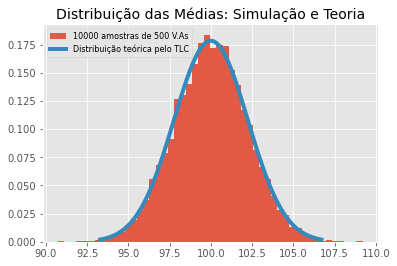

In [4]:
# Plottando
## Definindo intervalo
x = np.linspace(mu - 3*sigma/n**(1/2), mu + 3*sigma/n**(1/2), 100)

## Gráficos
### Histograma
plt.hist(medias, bins=50, density=True, alpha=.9,
         label=f"{num_amostras} amostras de {n} V.As")

### Distribuição do limite central
plt.plot(x, stats.norm.pdf(x, mu, sigma / n ** (1/2)),
         linewidth=4,
         label="Distribuição teórica pelo TLC")

### Título e Legenda
plt.title("Distribuição das Médias: Simulação e Teoria", size=14)
plt.legend(loc='upper left', fontsize=8)

# Estatísticas simuladas e teóricas
print(f"Média amostral: {round(np.mean(medias), 2)}. Valor teórico: {mu}.")
print(f"Desvio-padrão: {round(np.std(medias), 2)}. Valor teórico: {round(sigma / n ** (1/2), 2)}.")

### Simulações para $n$ e *num_amostras*

#### $n$

Vamos simular o que acontece quando nosso $n$ (número de VAs) aumenta. Em tese, esperaríamos apenas que a distribuição ficasse mais centrada, uma vez que $\sigma / \sqrt{n}$ ficaria cada vez menor.

Como estamos mantendo o mesmo número de amostras, o TLC ainda deve valer para qualquer $n$.

In [5]:
# Vendo como a aproximação varia conforme n aumenta
num_amostras = 5000
lista_n = [5, 10, 20, 50, 100, 500, 1000, 5000]
medias_n = np.zeros((len(lista_n), num_amostras), dtype=float)

# Simulando
for index, num in enumerate(lista_n):
    for i in range(num_amostras):
        # Gerando as n variáveis aleatórias
        Xi = np.random.normal(loc=mu, scale=sigma, size=num)

        # Tirando a média
        medias_n[index, i] = np.mean(Xi)

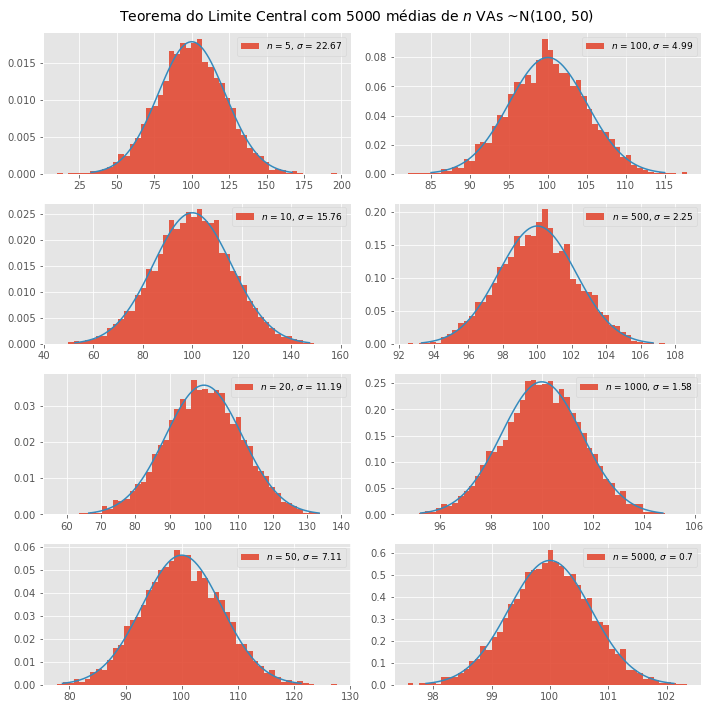

In [6]:
# Objeto gráfico
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# Adicionando gráficos
for j in range(2):
    for i in range(4):
        # Índice
        index = i if j == 0 else 4 + i

        # Intervalo
        x = np.linspace(mu - 3*sigma/lista_n[index]**(1/2), 
                        mu + 3*sigma/lista_n[index]**(1/2), 
                        100)

        # Gráficos
        axs[i, j].hist(medias_n[index, :], bins=50, density=True, alpha=.9,
                       label=fr"$n$ = {lista_n[index]}, $\sigma$ = {round(np.std(medias_n[index, :]), 2)}")
        axs[i, j].plot(x, stats.norm.pdf(x, mu, sigma / lista_n[index] ** (1/2)))
        axs[i, j].legend(fontsize=9)

# Estética
fig.suptitle(fr"Teorema do Limite Central com {num_amostras} médias de $n$ VAs ~N({mu}, {sigma})", 
             size=14)
fig.tight_layout()

#### *num_amostras*

In [7]:
# Criando função
def simula_distribuicao_normal_medias(mu, sigma, n_variaveis, num_amostras):
    medias = np.zeros(num_amostras, dtype=float)
    for i in range(num_amostras):
        # Gerando as n variáveis aleatórias
        Xi = np.random.normal(loc=mu, scale=sigma, size=n_variaveis)

        # Tirando a média
        medias[i] = np.mean(Xi)

    # Retornando
    return medias

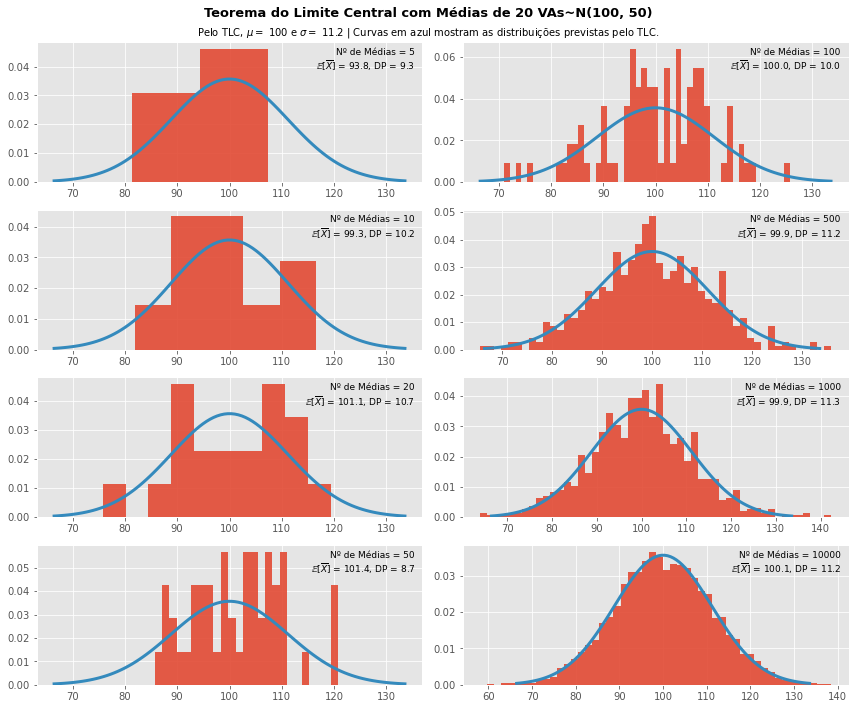

In [89]:
# Vendo como a aproximação varia conforme n aumenta
n = 20
lista_num_amostras = [5, 10, 20, 50, 100, 500, 1000, 10000]
medias_n = np.zeros((len(lista_num_amostras), len(lista_num_amostras)), dtype=float)

# Texto esperança
texto_esperanca = r"$\mathbb{E}[\overline{X}]$"

# Objeto gráfico
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

# Intervalo
x = np.linspace(mu - 3*sigma/n**(1/2), 
                mu + 3*sigma/n**(1/2), 
                100)

# Adicionando gráficos
for j in range(2):
    for i in range(4):
        # Índice
        index = i if j == 0 else 4 + i
        
        # Distribuição das médias
        dist_medias = simula_distribuicao_normal_medias(mu, sigma, n, lista_num_amostras[index])

        # Legenda
        label = (f"Nº de Médias = {lista_num_amostras[index]}\n"
                  fr"{texto_esperanca} = {round(np.mean(dist_medias), 1)}, DP = {round(np.std(dist_medias), 1)}")

        # Gráficos
        bins = 50 if lista_num_amostras[index] >= 100 else int(lista_num_amostras[index] / 2)

        axs[i, j].hist(dist_medias, bins=bins, density=True, alpha=.9)
        axs[i, j].plot(x, stats.norm.pdf(x, mu, sigma / n ** (1/2)), linewidth=3)
        axs[i, j].annotate(label, 
                           xy=(0.98, 0.8), xycoords='axes fraction', ha='right',
                           fontsize=9)

# Estética
fig.suptitle(f"Teorema do Limite Central com Médias de {n} VAs~N({mu}, {sigma})\n", 
             size=13, fontweight='bold')
fig.text(x=0.5, y=0.94, 
         s=fr"Pelo TLC, $\mu=$ {mu} e $\sigma=$ {round(sigma / n ** (1/2), 1)} | Curvas em azul mostram as distribuições previstas pelo TLC.",
         ha='center'
         )
fig.tight_layout()

### Plottando para várias distribuições

Vamos mostrar que o TLC vale para qualquer distribuição, seja ela discreta ou contínua.

In [19]:
# Parâmetros
n = 500
num_amostras = 10000

# Funções geradoras de números aleatórios de cada distribuição
funcoes = [
    np.random.binomial,
    np.random.geometric,
    np.random.poisson,
    np.random.uniform,
    np.random.exponential,
    np.random.normal,
    np.random.chisquare,
    np.random.standard_t
]

# Parâmetros associadas
parametros = [
    dict(n=10, p=.5),
    dict(p=.5),
    dict(lam=1),
    dict(low=0, high=1),
    dict(scale=1 / 1),
    dict(loc=0, scale=1),
    dict(df=5),
    dict(df=5)
]

# Número de distribuições
num_distribuicoes = len(funcoes)

# Simulando
medias_dist = np.zeros((num_distribuicoes, num_amostras), dtype=float)
for index, funcao in enumerate(funcoes):
    for i in range(num_amostras):
        # Gerando as n variáveis aleatórias
        Xi = funcao(size=n, **parametros[index])

        # Tirando a média
        medias_dist[index, i] = np.mean(Xi)

In [63]:
# Auxiliares para os gráficos
## Funções geradoras das funções de densidade de probabilidade
funcoes_grafico_continuas = [
    stats.uniform.pdf,
    stats.expon.pdf,
    stats.norm.pdf,
    stats.chi2.pdf,
    stats.t.pdf
]

## Intervalos
intervalos_grafico_continuas = [
    np.linspace(parametros[3]['low'], parametros[3]['high'], 100),
    np.linspace(0, 4, 100),
    np.linspace(-4, 4, 100),
    np.linspace(0, 20, 100),
    np.linspace(-4, 4, 100)
]

## Nomes
nomes_grafico = [
    fr"Binomial($n=${parametros[0]['n']}, $p=${parametros[0]['p']})", 
    fr"Geométrica($p=${parametros[1]['p']})", 
    fr"Poisson($\lambda=${parametros[2]['lam']})",
    fr"Binomial($a=${parametros[3]['low']}, $b=${parametros[3]['high']})", 
    fr"Exponencial($\lambda=${parametros[4]['scale']})", 
    fr"Normal($\mu=${parametros[5]['loc']}, $\sigma=${parametros[5]['scale']})",
    fr"Qui-Quadrado(df={parametros[6]['df']})", 
    fr"T-Student(df={parametros[7]['df']})"
]

## Médias
medias_grafico = [
    parametros[0]['n'] * parametros[0]['p'],
    1 / parametros[1]['p'],
    parametros[2]['lam'],
    (parametros[3]['high'] - parametros[3]['low']) / 2,
    1 / parametros[4]['scale'],
    parametros[5]['loc'],
    parametros[6]['df'],
    0
]

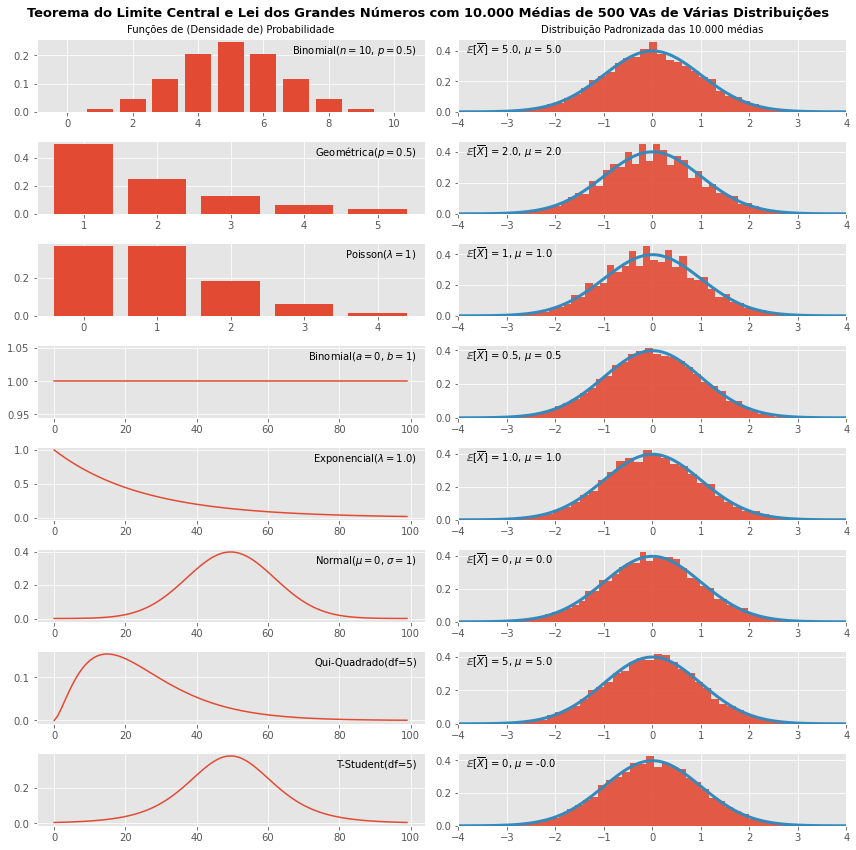

In [77]:
# Gráfico
## Objeto
fig, axs = plt.subplots(num_distribuicoes, 2, figsize=(12, 12))

## Para os gráficos de distribuições discretas, faremos na mão
axs[0, 0].set_title("Funções de (Densidade de) Probabilidade", size=10)

### Binomial
x = np.arange(0, parametros[0]['n'] + 1)
binom_dist = stats.binom(**parametros[0])
axs[0, 0].bar(x, binom_dist.pmf(x))
axs[0, 0].annotate(nomes_grafico[0], 
                   xy=(0.98, 0.8), xycoords='axes fraction', ha='right',
                   fontsize=10)
### Geométrica
x = np.arange(1, 3 * 1 / parametros[1]['p'])
geom_dist = stats.geom(**parametros[1])
axs[1, 0].bar(x, geom_dist.pmf(x))
axs[1, 0].annotate(nomes_grafico[1], 
                   xy=(0.98, 0.8), xycoords='axes fraction', ha='right',
                   fontsize=10)

### Poisson
x = np.arange(0, 5 * parametros[2]['lam'])
poisson_dist = stats.poisson(mu=parametros[2]['lam'])
axs[2, 0].bar(x, poisson_dist.pmf(x))
axs[2, 0].annotate(nomes_grafico[2], 
                   xy=(0.98, 0.8), xycoords='axes fraction', ha='right',
                   fontsize=10)

## Gráficos contínuos
for distribuicao in range(3, num_distribuicoes):
    x = intervalos_grafico_continuas[distribuicao - 3]
    try:
        axs[distribuicao, 0].plot(funcoes_grafico_continuas[distribuicao - 3](x, **parametros[distribuicao]))
    except TypeError:
        axs[distribuicao, 0].plot(funcoes_grafico_continuas[distribuicao - 3](x))
    axs[distribuicao, 0].annotate(nomes_grafico[distribuicao], 
                                  xy=(0.98, 0.8), xycoords='axes fraction', ha='right',
                                  fontsize=10)

## Plottando a distribuição (padronizada) das médias
### Intervalo
x = np.linspace(-4, 4, 100)

### Título superior
axs[0, 1].set_title(f"Distribuição Padronizada das {num_amostras / 10**3}00 médias", size=10)

### Gráficos das médias
for distribuicao in range(num_distribuicoes):
    ### Padronizando
    media_medias = np.mean(medias_dist[distribuicao, :])
    std_medias = np.std(medias_dist[distribuicao, :])
    media_padronizada = (medias_dist[distribuicao, :] - media_medias) / std_medias
    
    ### Plottando
    axs[distribuicao, 1].hist(media_padronizada, bins=50, density=True, alpha=.9)
    axs[distribuicao, 1].plot(x, stats.norm.pdf(x, 0, 1),
                              linewidth=3)
    axs[distribuicao, 1].annotate(text=fr"{texto_esperanca} = {medias_grafico[distribuicao]}, $\mu$ = {round(media_medias, 2)}",
                                  xy=(0.02, 0.8), xycoords='axes fraction', size=10)
    axs[distribuicao, 1].set_xlim(-4, 4)

# Estética
fig.suptitle(fr"Teorema do Limite Central e Lei dos Grandes Números com {num_amostras / 10**3}00 Médias de {n} VAs de Várias Distribuições", 
             size=13, fontweight='bold')
fig.tight_layout()